# **Cat And Dog Image Classification Using SVM**

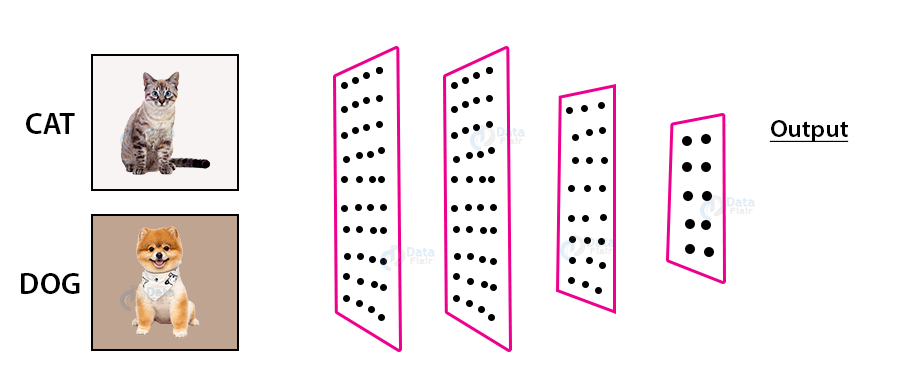



Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane.

## **Import Dependencies**

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Loading**

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
import os
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

# **Validating Data**

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

# **Data Augmentation**

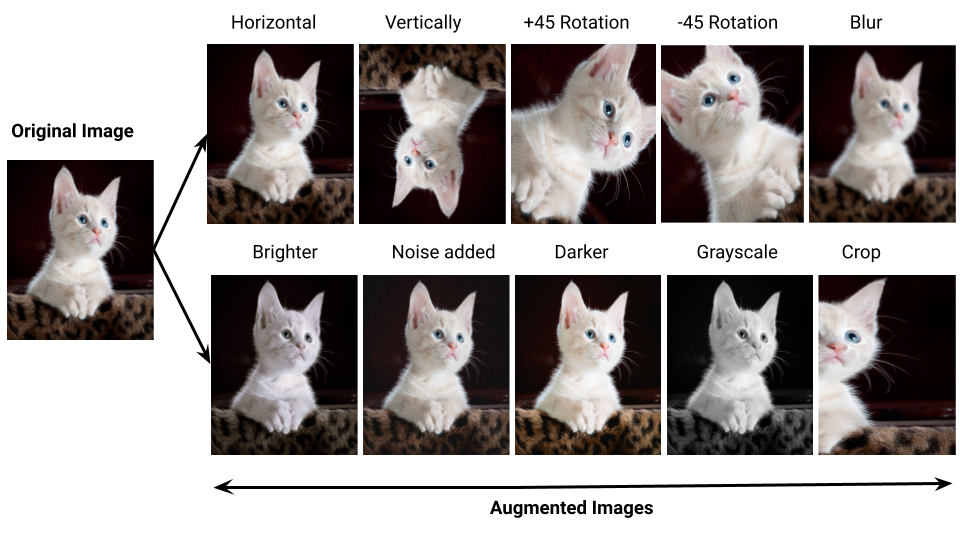

**Overfitting** can occur with a small dataset. To address this, we can augment the dataset by applying random transformations to existing samples, creating a larger and more varied training set. This helps the model generalize better by exposing it to different aspects of the data.

In tf.keras, we can use the ImageDataGenerator class for data augmentation. By specifying various transformations, the generator will apply these changes during training, ensuring the model never sees the exact same image twice.

We'll start by defining a function to display augmented images, then explore specific transformations.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


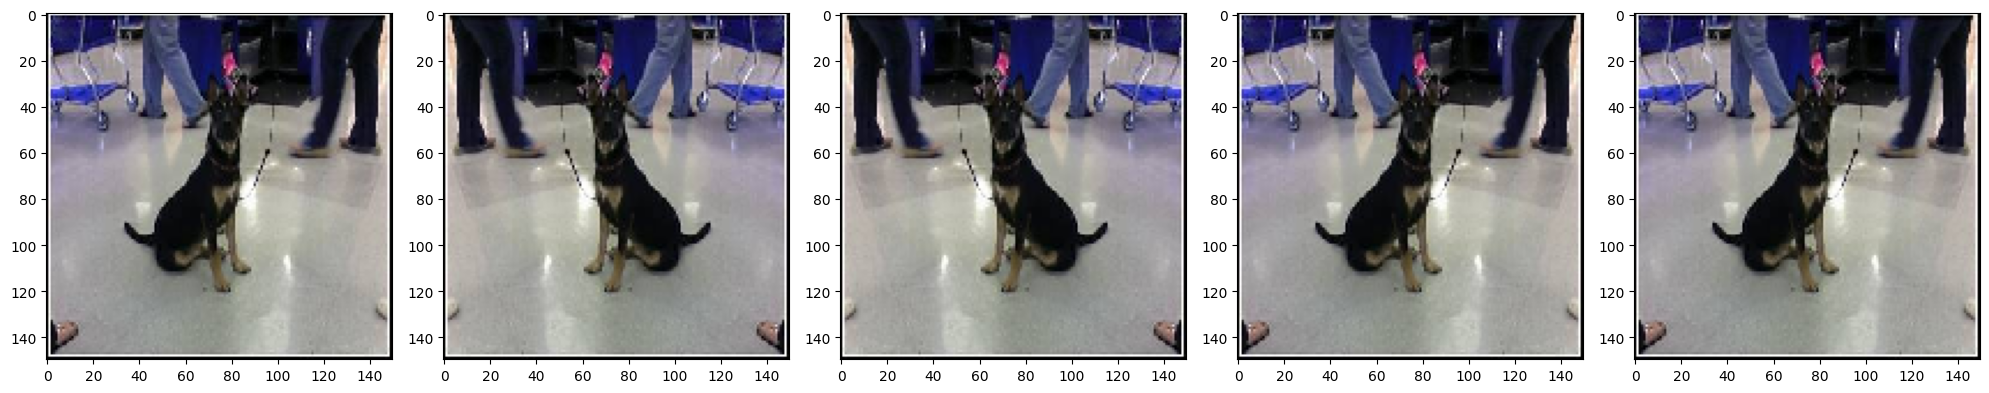

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


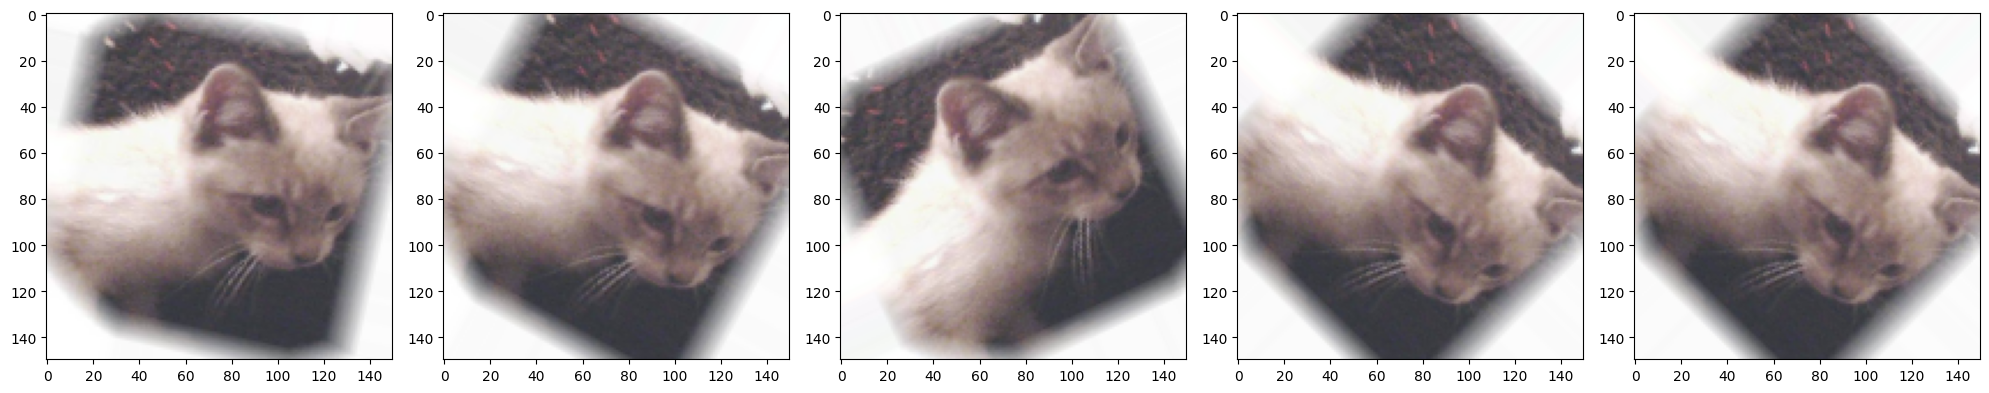

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


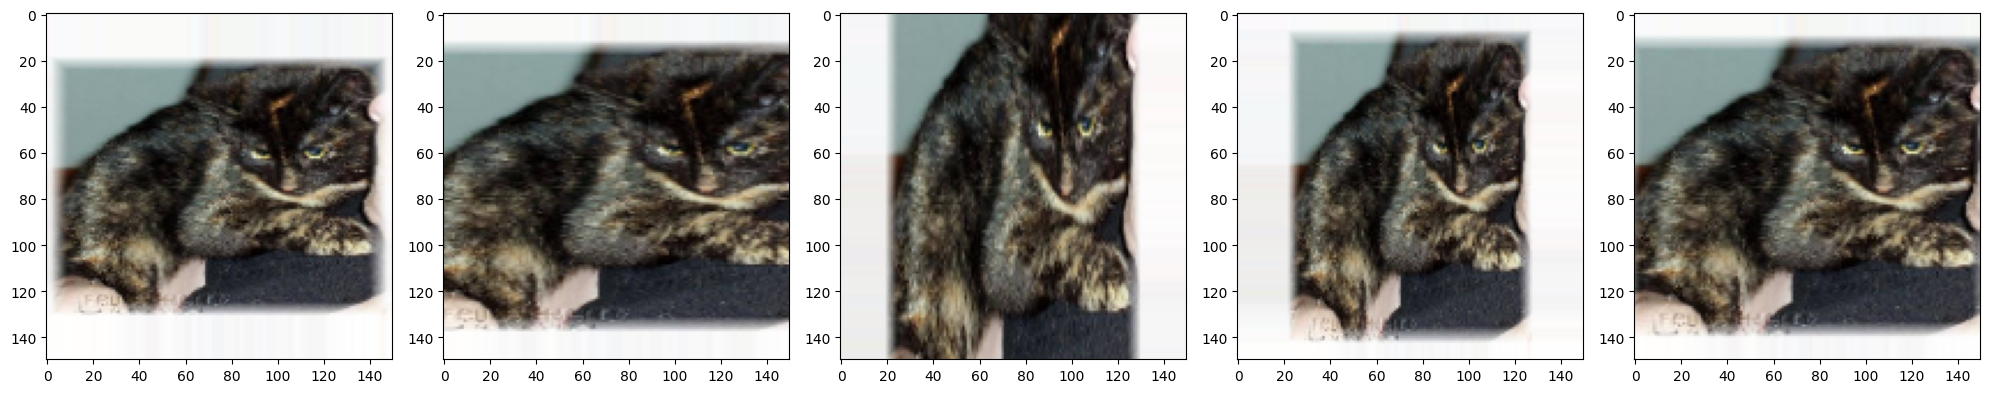

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


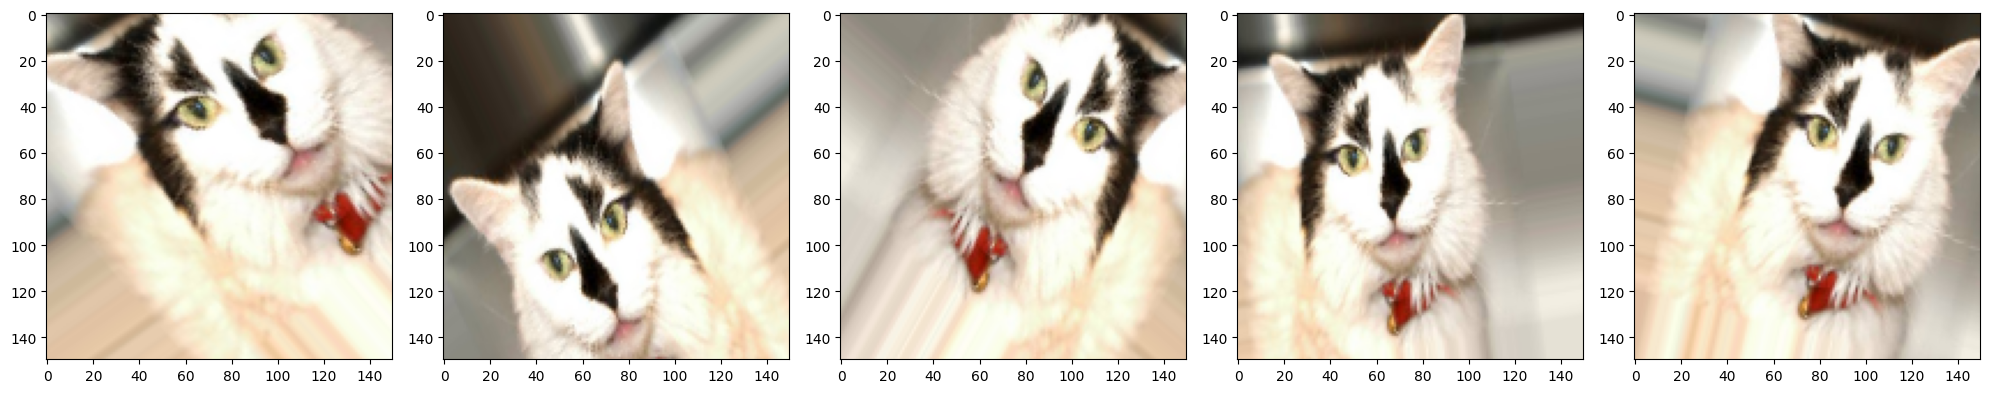

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## **Defining Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
epochs=10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-33-2939fac5536c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 124s 6s/step - loss: 0.6908 - accuracy: 0.5290 - val_loss: 0.6790 - val_accuracy: 0.5190
Epoch 2/10
20/20 [==============================] - 129s 6s/step - loss: 0.6904 - accuracy: 0.5260 - val_loss: 0.6755 - val_accuracy: 0.5540
Epoch 3/10
20/20 [==============================] - 133s 7s/step - loss: 0.6810 - accuracy: 0.5715 - val_loss: 0.6533 - val_accuracy: 0.6100
Epoch 4/10
20/20 [==============================] - 127s 6s/step - loss: 0.6614 - accuracy: 0.5945 - val_loss: 0.6248 - val_accuracy: 0.6530
Epoch 5/10
20/20 [==============================] - 143s 7s/step - loss: 0.6442 - accuracy: 0.6235 - val_loss: 0.6207 - val_accuracy: 0.6690
Epoch 6/10
20/20 [==============================] - 124s 6s/step - loss: 0.6310 - accuracy: 0.6375 - val_loss: 0.5846 - val_accuracy: 0.6860
Epoch 7/10
20/20 [==============================] - 124s 6s/step - loss: 0.6330 - accuracy: 0.6330 - val_loss: 0.6164 - val_accuracy: 0.6390
Epoch 8/10
20

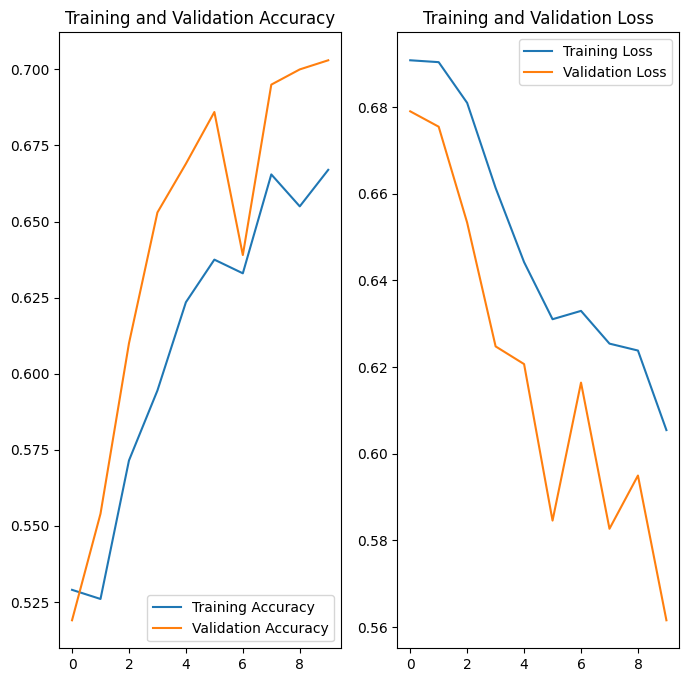

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **SVM Model**

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Image data generator for augmentation
IMG_SHAPE = 150
BATCH_SIZE = 100

image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

# Function to extract images and labels from the data generator
def extract_images_labels(data_gen, num_samples):
    images, labels = [], []
    for _ in range(num_samples // BATCH_SIZE):
        img_batch, label_batch = next(data_gen)
        for img, label in zip(img_batch, label_batch):
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (64, 64)).flatten()  # Resize and flatten
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess training data
num_train_samples = train_data_gen.samples
X_train, y_train = extract_images_labels(train_data_gen, num_train_samples)

# Load and preprocess validation data
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

num_val_samples = val_data_gen.samples
X_val, y_val = extract_images_labels(val_data_gen, num_val_samples)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train SVM model
svm_model = SVC(kernel='linear')  # Change kernel as needed
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Validation Accuracy: 51.40%


# **Predicting Dog or Cat**

Prediction raw output: 0.0


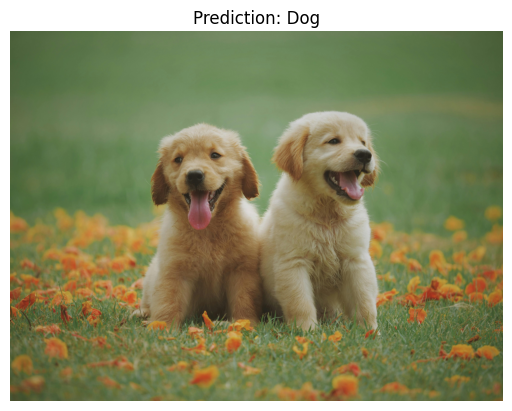

The image is a: Dog


In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def predict_image(image_path, scaler, svm_model):
    # Check if image exists
    if not os.path.exists(image_path):
        raise ValueError("Invalid image path.")

    # Read and resize the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Failed to read image.")

    # Check image dimensions
    if img.shape[0] == 0 or img.shape[1] == 0:
        raise ValueError("Invalid image dimensions.")

    img_resized = cv2.resize(img, (64, 64)).flatten()
    img_scaled = scaler.transform([img_resized])
    prediction = svm_model.predict(img_scaled)

    # Debug prints
    print(f"Prediction raw output: {prediction[0]}")

    label = 'Dog' if prediction[0] == 0 else 'Cat'

    # Display the image
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label

# Example usage
image_path = '/content/pexels-photo-1108099.jpeg'  # Replace with actual image path
prediction = predict_image(image_path, scaler, svm_model)
print(f"The image is a: {prediction}")
